In [1]:
import tsmd_evaluation.prom as prom

import loconsensus.loconsensus as loconsensus
import locomotif.locomotif as locomotif

from experiments.experiment_setup import ExperimentConfig, ExperimentStaticMotif

import  numpy as np
import matplotlib.pyplot as plt

import time

In [2]:
config = ExperimentConfig(
    n_ts = 5,
    len_ts = 2000,
    n_dims = 3,
    len_base_motif=50
)
gen = ExperimentStaticMotif(config)

ts_list, m_pos = gen.generate_experiment()

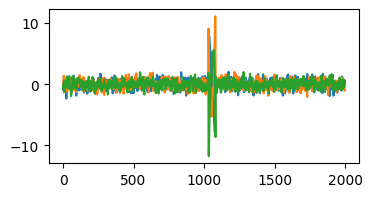

In [3]:
plt.figure(figsize=(4,2))
plt.plot(ts_list[0])
plt.show()

In [4]:
concat_list = np.concatenate(ts_list, axis=0)
l_min = config.len_base_motif // 2
l_max = config.len_base_motif * 2
rho = 0.8
nb = None

start_time = time.perf_counter()
motifs1 = loconsensus.apply_loconsensus(ts_list, l_min, l_max, rho, nb)
end_time = time.perf_counter() - start_time
print(f'{end_time:.2f}')

start_time = time.perf_counter()
motifs2 = locomotif.apply_locomotif(concat_list, l_min, l_max, rho, nb)
end_time = time.perf_counter() - start_time
print(f'{end_time:.2f}')

27.45
37.57


In [5]:
M, _, _ = prom.matching_matrix([m_pos], [motif_set[1] for motif_set in motifs1])
print(M)
print()
print("Micro averaged PROM")
print(f"Precision: {prom.micro_averaged_precision(M)}")
print(f"Recall: {prom.micro_averaged_recall(M)}")
print(f"F1-score: {prom.micro_averaged_f1(M)}")

[[ 5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 32. 25. 19.  9. 13.  9. 12. 10.  7.  6.  5.  5.  4.  3.  3.  3.  5.
   5.  2.  3.  3.  3.  3.  3.  3.  3.  2.  3.  2.  2.  2.  2.  2.  2.  2.
   2.  2.  2.  2.  2.  2.  2.  2.  2. nan]]

Micro averaged PROM
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
M, _, _ = prom.matching_matrix([m_pos], [motif_set[1] for motif_set in motifs2])
print(M)
print()
print("Micro averaged PROM")
print(f"Precision: {prom.micro_averaged_precision(M)}")
print(f"Recall: {prom.micro_averaged_recall(M)}")
print(f"F1-score: {prom.micro_averaged_f1(M)}")

[[ 5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 38. 24. 20. 12. 12. 10.  7.  7.  6.  5.  5.  5.  4.  4.  4.  4.  4.
   4.  3.  3.  3.  3.  3.  3.  3.  3.  3.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2. nan]]

Micro averaged PROM
Precision: 1.0
Recall: 1.0
F1-score: 1.0
